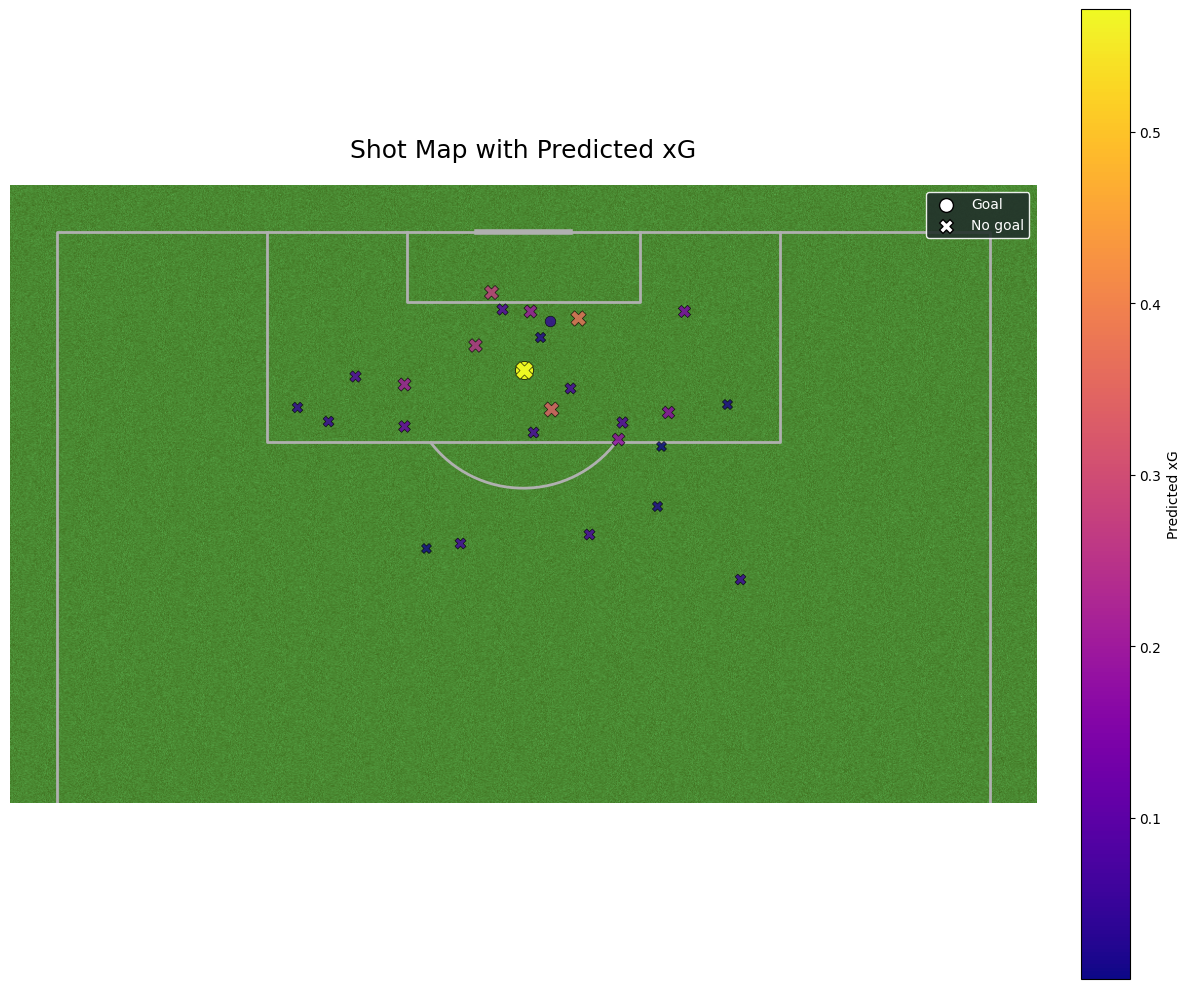

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch,  VerticalPitch
import pickle


# Charger le modèle et le scaler
with open("models/xgboost.pkl", "rb") as f:
    model = pickle.load(f)
# 1. Charger ton dataset enrichi avec les prédictions
#    Il doit contenir : x, y, goal, et y_proba (xG prédite)
df = pd.read_csv("data/psg_marseille_shots_enriched.csv")
# Features & Target
features = ["x", "y", "shot_body_part", "shot_technique", "under_pressure", "shot_first_time","distance_to_goal","angle_to_goal","is_central_zone","is_left_side","is_right_side"]
target = "goal"

X = df[features]
# Supposons que tu as déjà fait :
df['y_proba'] = model.predict_proba(X)[:,1]
# Si ce n'est pas fait, recharge X et ton modèle et calcule y_proba ici.

# 2. Créer le pitch
pitch = VerticalPitch(pitch_type='statsbomb',pitch_color='grass',half=True,pad_bottom=-11)
fig, ax = pitch.draw(figsize=(12, 10))

shot_colour='red'
goal_colour='blue'

# 3. Normaliser les xG pour la colormap
norm = plt.Normalize(df['y_proba'].min(), df['y_proba'].max())
cmap = plt.cm.plasma

# 4. Tracer chaque tir
for _, shot in df.iterrows():
    color = cmap(norm(shot['y_proba']))
    marker = 'o' if shot['goal'] == 1 else 'X'
    size = 200 * shot['y_proba'] + 50          # ajuster l’échelle si besoin
    pitch.scatter(shot['x'], shot['y'], ax=ax,
                  s=size, marker=marker,
                  color=color, edgecolors='black',
                  linewidth=0.5, alpha=0.8)

# 5. Ajouter la colorbar et légendes
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Predicted xG')

# Légende manuelle
ax.scatter([], [], c='white', edgecolors='black', marker='o', s=100, label='Goal')
ax.scatter([], [], c='white', edgecolors='black', marker='X', s=100, label='No goal')
ax.legend(loc='upper right', facecolor='#22312b', framealpha=0.9, edgecolor='white', labelcolor='white')

# 6. Titre
ax.set_title("Shot Map with Predicted xG", color='black', fontsize=18, pad=20)

plt.show()
